<a href="https://colab.research.google.com/github/MilkButterCheese/UOS_ComputationalPhysics/blob/master/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline 

#모듈이 따로 안불러와져서 여따 적어놈
## module gaussPivot
'''
    x = gaussPivot(a,b,tol=1.0e-12).
    Solves [a]{x} = {b} by Gauss elimination with
    scaled row pivoting
'''
import numpy as np
#import swap
#import error
def gaussPivot(a,b,tol=1.0e-12):
    n = len(b)
  # Set up scale factors
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))
    for k in range(0,n-1):
  # Row interchange, if needed
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol: error.err('Matrix is singular')
        if p != k:
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
      # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    
    if abs(a[n-1,n-1]) < tol: error.err('Matrix is singular')
  # Back substitution
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b

## module swap
'''
    swapRows(v,i,j).
    Swaps rows i and j of a vector or matrix [v].
    swapCols(v,i,j).
    Swaps columns of matrix [v]
'''
def swapRows(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]

def swapCols(v,i,j):
    v[:,[i,j]] = v[:,[j,i]]





### module LUdecomp3
''' 
    c,d,e = LUdecomp3(c,d,e).
    LU decomposition of tridiagonal matrix [c\d\e]. On output
    {c},{d} and {e} are the diagonals of the decomposed matrix.
    x = LUsolve(c,d,e,b).
    Solves [c\d\e]{x} = {b}, where {c}, {d} and {e} are the
    vectors returned from LUdecomp3.
'''

def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    
    return c,d,e

def LUsolve3(c,d,e,b):
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    
    return b




### module neville
'''
    p = neville(xData,yData,x).
    Evaluates the polynomial interpolant p(x) that passes
    through the specified data points by Neville’s method.
'''
def neville(xData, yData, x):
    m = len(xData) # number of data points
    y = yData.copy()
    for k in range(1, m):
        y[0:m-k] = ((x-xData[k:m])*y[0:m-k] + 
                (xData[0:m-k] - x)*y[1:m-k+1])/(xData[0:m-k] - xData[k:m])

    return y[0]



## module newtonPoly
'''
    p = evalPoly(a,xData,x).
    Evaluates Newton’s polynomial p at x. The coefficient
    vector {a} can be computed by the function ’coeffts’.
    a = coeffts(xData,yData).
    Computes the coefficients of Newton’s polynomial.
'''
def evalPoly(a,xData,x):
    n = len(xData) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p

def coeffts(xData,yData):
    m = len(xData)  # Number of data points
    a = yData.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])
    return a



## module plotPoly
'''
    plotPoly(xData,yData,coeff,xlab=’x’,ylab=’y’)
    Plots data points and the fitting
    polynomial defined by its coefficient
    array coeff = [a0, a1. ...]
    xlab and ylab are optional axis labels
'''
import numpy as np
import matplotlib.pyplot as plt
def plotPoly(xData,yData,coeff,xlab='x',ylab='y'):
    m = len(coeff)
    x1 = min(xData)
    x2 = max(xData)
    dx = (x2 - x1)/20.0
    x = np.arange(x1,x2 + dx/10.0,dx)
    y = np.zeros((len(x)))*1.0
    for i in range(m):
        y = y + coeff[i]*x**i
    
    plt.plot(xData,yData,'o',x,y,'-')
    plt.xlabel(xlab); plt.ylabel(ylab)
    plt.grid(True)
    plt.show()
    
    
    
    
## module polyFit
'''
    c = polyFit(xData,yData,m).
    Returns coefficients of the polynomial
    p(x) = c[0] + c[1]x + c[2]xˆ2 +...+ c[m]xˆm
    that fits the specified data in the least
    squares sense.
    sigma = stdDev(c,xData,yData).
    Computes the std. deviation between p(x)
    and the data.
'''

def polyFit(xData,yData,m):
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xData[i]
        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xData[i]
    for i in range(m+1):
        for j in range(m+1):
            a[i,j] = s[i+j]

    return gaussPivot(a,b)

def stdDev(c,xData,yData):

    def evalPoly(c,x):
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p*x + c[m-j-1]
        return p
    
    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0
    for i in range(n+1):
        p = evalPoly(c,xData[i])
        sigma = sigma + (yData[i] - p)**2
    sigma = math.sqrt(sigma/(n - m))
    return sigma



## module rational
'''
    p = rational(xData,yData,x)
    Evaluates the diagonal rational function interpolant p(x)
    that passes through the data points
'''

import numpy as np

def rational(xData, yData, x):
    m = len(xData)
    r = yData.copy()
    rOld = np.zeros(m)
    for k in range(m-1):
        for i in range(m-k-1):
            if abs(x - xData[i+k+1]) < 1.0e-9:
                return yData[i+k+1]
            else:
                c1 = r[i+1] - r[i]
                c2 = r[i+1] - rOld[i+1]
                c3 = (x - xData[i])/(x - xData[i+k+1])
                r[i] = r[i+1] + c1/(c3*(1.0 - c1/c2) - 1.0)
                rOld[i+1] = r[i+1]

    return r[0]



## module cubicSpline
'''
    k = curvatures(xData,yData).
    Returns the curvatures of cubic spline at its knots.
    y = evalSpline(xData,yData,k,x).
    Evaluates cubic spline at x. The curvatures k can be
    computed with the function ’curvatures’.
'''

def curvatures(xData,yData):
    n = len(xData) - 1
    c = np.zeros(n)
    d = np.ones(n+1)
    e = np.zeros(n)
    k = np.zeros(n+1)
    c[0:n-1] = xData[0:n-1] - xData[1:n]
    d[1:n] = 2.0*(xData[0:n-1] - xData[2:n+1])
    e[1:n] = xData[1:n] - xData[2:n+1]
    k[1:n] =6.0*(yData[0:n-1] - yData[1:n])/(xData[0:n-1] - xData[1:n]) \
            - 6.0*(yData[1:n] - yData[2:n+1])/(xData[1:n] - xData[2:n+1])
    LUdecomp3(c,d,e)
    LUsolve3(c,d,e,k)
    
    return k

def evalSpline(xData,yData,k,x):
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft) <= 1: return iLeft
            i =(iLeft + iRight)/2
            if x < xData[i]: iRight = i
            else: iLeft = i
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 \
            - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0   \
            + (yData[i]*(x - xData[i+1])                            \
            - yData[i+1]*(x - xData[i]))/h
            
    return y


#polyfit 
#curve_fit

data=np.genfromtxt('/content/drive/MyDrive/ComputatinalPhysics/Week7/data/datafolder/3.1_1.dat',delimiter=',')
#Polyfit
#Newville
#Newton
#rational
#모두 선형근사
cf= np.polyfit(data[0],data[1],1) # xdata,ydata,degree
ffun=np.poly1d(cf) 
print(ffun)

#Code the linear regression fromular
#Problem1
#y=bx+a
x=data[0,:]
y=data[1,:]
n=len(x)
xavg=0
yavg=0
for j in range(0,n):
    xavg= xavg+ x[j]/n
    yavg= yavg+ y[j]/n

up=0
down=0
for j in range(0,n):
    up=up+ y[j]*(x[j]-xavg)
    down=down+ x[j]*(x[j]-xavg)

b=up/down
a=yavg-xavg/b
print(b,a)


# newtonPoly: Pn(x)=a_0+a_1(x-x_0)+(x-x_0)(x-x_1)a_2+..
x=np.array([-1.2,0.3,1.1])
y=np.array([-5.76,-5.61,-3.69])
print(neville(x,y,1))

#ratinal(xdata,ydata,x)


#문제 풀기 3.16,17번 >제대로 못풀었음
data=np.genfromtxt('/content/drive/MyDrive/ComputatinalPhysics/Week7/data/datafolder/3.1_16.dat',delimiter=',')
xdata=data[:,0]
ydata=data[:,1]
n=len(xdata)
m=40
print(n)
x=np.linspace(x[0],x[-1],m)

yne=np.zeros(m)
yra=np.zeros(m)

for j in range(0,m):
    yne[j]= neville(xdata,ydata,x[j])
    yra[j]=rational(xdata,ydata,x[j])

print(yne)
print(yra)


 
0.7973 x - 5.073
0.7973105134474328 -5.103614433200449
-4.000000000000001
2
[-3.15757403 -3.00139154 -2.84520906 -2.68902657 -2.53284409 -2.37666161
 -2.22047912 -2.06429664 -1.90811415 -1.75193167 -1.59574918 -1.4395667
 -1.28338422 -1.12720173 -0.97101925 -0.81483676 -0.65865428 -0.50247179
 -0.34628931 -0.19010683 -0.03392434  0.12225814  0.27844063  0.43462311
  0.59080559  0.74698808  0.90317056  1.05935305  1.21553553  1.37171802
  1.5279005   1.68408298  1.84026547  1.99644795  2.15263044  2.30881292
  2.4649954   2.62117789  2.77736037  2.93354286]
[ 5.02990295e-03  5.22331089e-03  5.43218732e-03  5.65846526e-03
  5.90441380e-03  6.17271450e-03  6.46655949e-03  6.78977913e-03
  7.14700989e-03  7.54391818e-03  7.98750316e-03  8.48651304e-03
  9.05202785e-03  9.69829183e-03  1.04439298e-02  1.13137714e-02
  1.23416696e-02  1.35750098e-02  1.50822217e-02  1.69659210e-02
  1.93873052e-02  2.26149167e-02  2.71318443e-02  3.39034572e-02
  4.51794139e-02  6.76936598e-02  1.34936564e

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline 

#모듈이 따로 안불러와져서 여따 적어놈
## module gaussPivot
'''
    x = gaussPivot(a,b,tol=1.0e-12).
    Solves [a]{x} = {b} by Gauss elimination with
    scaled row pivoting
'''
import numpy as np
#import swap
#import error
def gaussPivot(a,b,tol=1.0e-12):
    n = len(b)
  # Set up scale factors
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))
    for k in range(0,n-1):
  # Row interchange, if needed
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol: error.err('Matrix is singular')
        if p != k:
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
      # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    
    if abs(a[n-1,n-1]) < tol: error.err('Matrix is singular')
  # Back substitution
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b

## module swap
'''
    swapRows(v,i,j).
    Swaps rows i and j of a vector or matrix [v].
    swapCols(v,i,j).
    Swaps columns of matrix [v]
'''
def swapRows(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]

def swapCols(v,i,j):
    v[:,[i,j]] = v[:,[j,i]]





### module LUdecomp3
''' 
    c,d,e = LUdecomp3(c,d,e).
    LU decomposition of tridiagonal matrix [c\d\e]. On output
    {c},{d} and {e} are the diagonals of the decomposed matrix.
    x = LUsolve(c,d,e,b).
    Solves [c\d\e]{x} = {b}, where {c}, {d} and {e} are the
    vectors returned from LUdecomp3.
'''

def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    
    return c,d,e

def LUsolve3(c,d,e,b):
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    
    return b




### module neville
'''
    p = neville(xData,yData,x).
    Evaluates the polynomial interpolant p(x) that passes
    through the specified data points by Neville’s method.
'''
def neville(xData, yData, x):
    m = len(xData) # number of data points
    y = yData.copy()
    for k in range(1, m):
        y[0:m-k] = ((x-xData[k:m])*y[0:m-k] + 
                (xData[0:m-k] - x)*y[1:m-k+1])/(xData[0:m-k] - xData[k:m])

    return y[0]



## module newtonPoly
'''
    p = evalPoly(a,xData,x).
    Evaluates Newton’s polynomial p at x. The coefficient
    vector {a} can be computed by the function ’coeffts’.
    a = coeffts(xData,yData).
    Computes the coefficients of Newton’s polynomial.
'''
def evalPoly(a,xData,x):
    n = len(xData) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p

def coeffts(xData,yData):
    m = len(xData)  # Number of data points
    a = yData.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])
    return a



## module plotPoly
'''
    plotPoly(xData,yData,coeff,xlab=’x’,ylab=’y’)
    Plots data points and the fitting
    polynomial defined by its coefficient
    array coeff = [a0, a1. ...]
    xlab and ylab are optional axis labels
'''
import numpy as np
import matplotlib.pyplot as plt
def plotPoly(xData,yData,coeff,xlab='x',ylab='y'):
    m = len(coeff)
    x1 = min(xData)
    x2 = max(xData)
    dx = (x2 - x1)/20.0
    x = np.arange(x1,x2 + dx/10.0,dx)
    y = np.zeros((len(x)))*1.0
    for i in range(m):
        y = y + coeff[i]*x**i
    
    plt.plot(xData,yData,'o',x,y,'-')
    plt.xlabel(xlab); plt.ylabel(ylab)
    plt.grid(True)
    plt.show()
    
    
    
    
## module polyFit
'''
    c = polyFit(xData,yData,m).
    Returns coefficients of the polynomial
    p(x) = c[0] + c[1]x + c[2]xˆ2 +...+ c[m]xˆm
    that fits the specified data in the least
    squares sense.
    sigma = stdDev(c,xData,yData).
    Computes the std. deviation between p(x)
    and the data.
'''

def polyFit(xData,yData,m):
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xData[i]
        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xData[i]
    for i in range(m+1):
        for j in range(m+1):
            a[i,j] = s[i+j]

    return gaussPivot(a,b)

def stdDev(c,xData,yData):

    def evalPoly(c,x):
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p*x + c[m-j-1]
        return p
    
    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0
    for i in range(n+1):
        p = evalPoly(c,xData[i])
        sigma = sigma + (yData[i] - p)**2
    sigma = math.sqrt(sigma/(n - m))
    return sigma



## module rational
'''
    p = rational(xData,yData,x)
    Evaluates the diagonal rational function interpolant p(x)
    that passes through the data points
'''

import numpy as np

def rational(xData, yData, x):
    m = len(xData)
    r = yData.copy()
    rOld = np.zeros(m)
    for k in range(m-1):
        for i in range(m-k-1):
            if abs(x - xData[i+k+1]) < 1.0e-9:
                return yData[i+k+1]
            else:
                c1 = r[i+1] - r[i]
                c2 = r[i+1] - rOld[i+1]
                c3 = (x - xData[i])/(x - xData[i+k+1])
                r[i] = r[i+1] + c1/(c3*(1.0 - c1/c2) - 1.0)
                rOld[i+1] = r[i+1]

    return r[0]



## module cubicSpline
'''
    k = curvatures(xData,yData).
    Returns the curvatures of cubic spline at its knots.
    y = evalSpline(xData,yData,k,x).
    Evaluates cubic spline at x. The curvatures k can be
    computed with the function ’curvatures’.
'''

def curvatures(xData,yData):
    n = len(xData) - 1
    c = np.zeros(n)
    d = np.ones(n+1)
    e = np.zeros(n)
    k = np.zeros(n+1)
    c[0:n-1] = xData[0:n-1] - xData[1:n]
    d[1:n] = 2.0*(xData[0:n-1] - xData[2:n+1])
    e[1:n] = xData[1:n] - xData[2:n+1]
    k[1:n] =6.0*(yData[0:n-1] - yData[1:n])/(xData[0:n-1] - xData[1:n]) \
            - 6.0*(yData[1:n] - yData[2:n+1])/(xData[1:n] - xData[2:n+1])
    LUdecomp3(c,d,e)
    LUsolve3(c,d,e,k)
    
    return k

def evalSpline(xData,yData,k,x):
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft) <= 1: return iLeft
            i =(iLeft + iRight)/2
            if x < xData[i]: iRight = i
            else: iLeft = i
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 \
            - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0   \
            + (yData[i]*(x - xData[i+1])                            \
            - yData[i+1]*(x - xData[i]))/h
            
    return y

######################################



[-4.8276441   8.00422541  0.21463893]
-9.6552882
[-5.30840843  8.7998192 ]
-10.616816858595023


[]

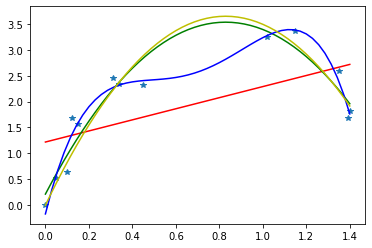

In [41]:
import numpy as np
from scipy.interpolate import* 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Problem1 
#Data 받아오고 설정하기
data= np.genfromtxt('/content/drive/MyDrive/ComputatinalPhysics/Week7/quiz5-1.txt')
t=data[:,0]
y=data[:,1]

pfit1= np.polyfit(t,y,1)
pfit2= np.polyfit(t,y,2)
pfit4= np.polyfit(t,y,4)

line1= np.poly1d(pfit1)
line2= np.poly1d(pfit2)
line4= np.poly1d(pfit4)

tt=np.linspace(t[0],t[-1],50)
yy1=line1(tt)
yy2=line2(tt)
yy4=line4(tt)

plt.plot(t,y,'*')
plt.plot(tt,yy1,'r')
plt.plot(tt,yy2,'g')
plt.plot(tt,yy4,'b')

#1-2 4차함수가 더 데이터와 fitting된 것 같은 모양세이지만 적은 데이터로 인해
#overfitted 되었다고 보아야 한다. 공기저항이 없는 상태에서 자유낙하 운동의 경우
#시간 t에 대하여 y가 2차함수의 꼴이 되기 때문이다. 따라서 데이터가 많아질수록
#2차 함수에 더 적합한 형태가 될 것이다

#1-3

print(pfit2)
print(-4.8276441*2)# g= -9.7 #v_0=8.0

#2
def f(t,a,b): 
    return a*(t**2)+ b*t

parm, var= curve_fit(f,t ,y)
print(parm)
print(parm[0]*2) #g=-10.6 v_0=8.8

yyf=f(tt,parm[0],parm[1])
plt.plot(tt,yyf,'y')
plt.plot()

[ 1.4  3.2 -0.3  6.5  4.8 -0.7  5.5  6.5  1.7]


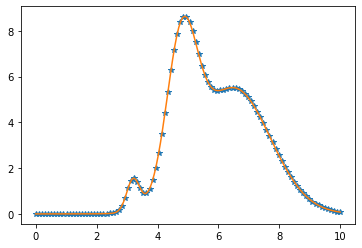

In [37]:
import numpy as np
from scipy.interpolate import* 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#Problem3
#Data 받아오고 설정하기
data= np.genfromtxt('/content/drive/MyDrive/ComputatinalPhysics/Week7/quiz5-3.txt')
x=data[:,0]
y=data[:,1]
p0 =np.array ([ 5,  6, -2,  5,  4, -1,2,  8,  2])

def f(x,a1,b1,c1,a2,b2,c2,a3,b3,c3): 
    return a1*np.exp(-(x-b1)**2/(c1**2)) +a2*np.exp(-(x-b2)**2/(c2**2))+ a3*np.exp(-(x-b3)**2/(c3**2))

parm, var= curve_fit(f,x ,y,p0)
xx=np.linspace(x[0],x[-1],150)
yy=f(xx,parm[0],parm[1],parm[2],parm[3],parm[4],parm[5],parm[6],parm[7],parm[8])
plt.plot(x,y,'*')
plt.plot(xx,yy)
plt.plot()
print(parm)
#[a1,b1,c1,a2,b2,c2,a3,b3,c3]= [ 1.4  3.2 -0.3  6.5  4.8 -0.7  5.5  6.5  1.7]